#### Decision Tree classification

Basic Machine Learning Pipeline
- Load libraries
- Import data set
- Preprocessing
- Encoding categorical variables
- Split the data set into training and testing sets
- Instantiate the Classifier specifying hyperparameters
- Train the Classifier on the training data
- Evaluate the performance of the Classifier

In [1]:
# %pip install scikit-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report

from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('heart_after_EDA.csv')

In [4]:
df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,240.581699,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,53.982967,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Encoding

In [6]:
categorical_feat = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
categorical_data = df[categorical_feat]

In [7]:
encoder = OneHotEncoder()
encoder.fit(categorical_data)
encoded_data = encoder.transform(categorical_data)

In [8]:
# Concat data to original
edcoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_feat))
df_encoded = pd.concat([df.drop(categorical_feat, axis=1), edcoded_df], axis=1)
print(f'Amount of features after using OneHotEncoder: {len(df_encoded.columns)}')

Amoount of features after using OneHotEncoder: 21


Split target (y) from features (x)

In [9]:
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

Split data set into test and train sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [11]:
print(f'Training set shape {Counter(y_train)}')
print(f'Testing set shape {Counter(y_test)}')

Training set shape Counter({1: 344, 0: 298})
Testing set shape Counter({1: 164, 0: 112})


In [37]:
def model(classifier):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    target_names = ['Class 0', 'Class 1']
    return print(classification_report(y_test, y_pred, target_names=target_names, digits=5))

Train the Classifier - Decision Tree 

In [38]:
classifier_dt = DecisionTreeClassifier(max_depth=4, random_state=42, min_samples_leaf=1)
model(classifier_dt)

              precision    recall  f1-score   support

     Class 0    0.80734   0.78571   0.79638       112
     Class 1    0.85629   0.87195   0.86405       164

    accuracy                        0.83696       276
   macro avg    0.83181   0.82883   0.83021       276
weighted avg    0.83642   0.83696   0.83659       276



Text(0.5, 1.0, 'Decision tree trained on all data set features')

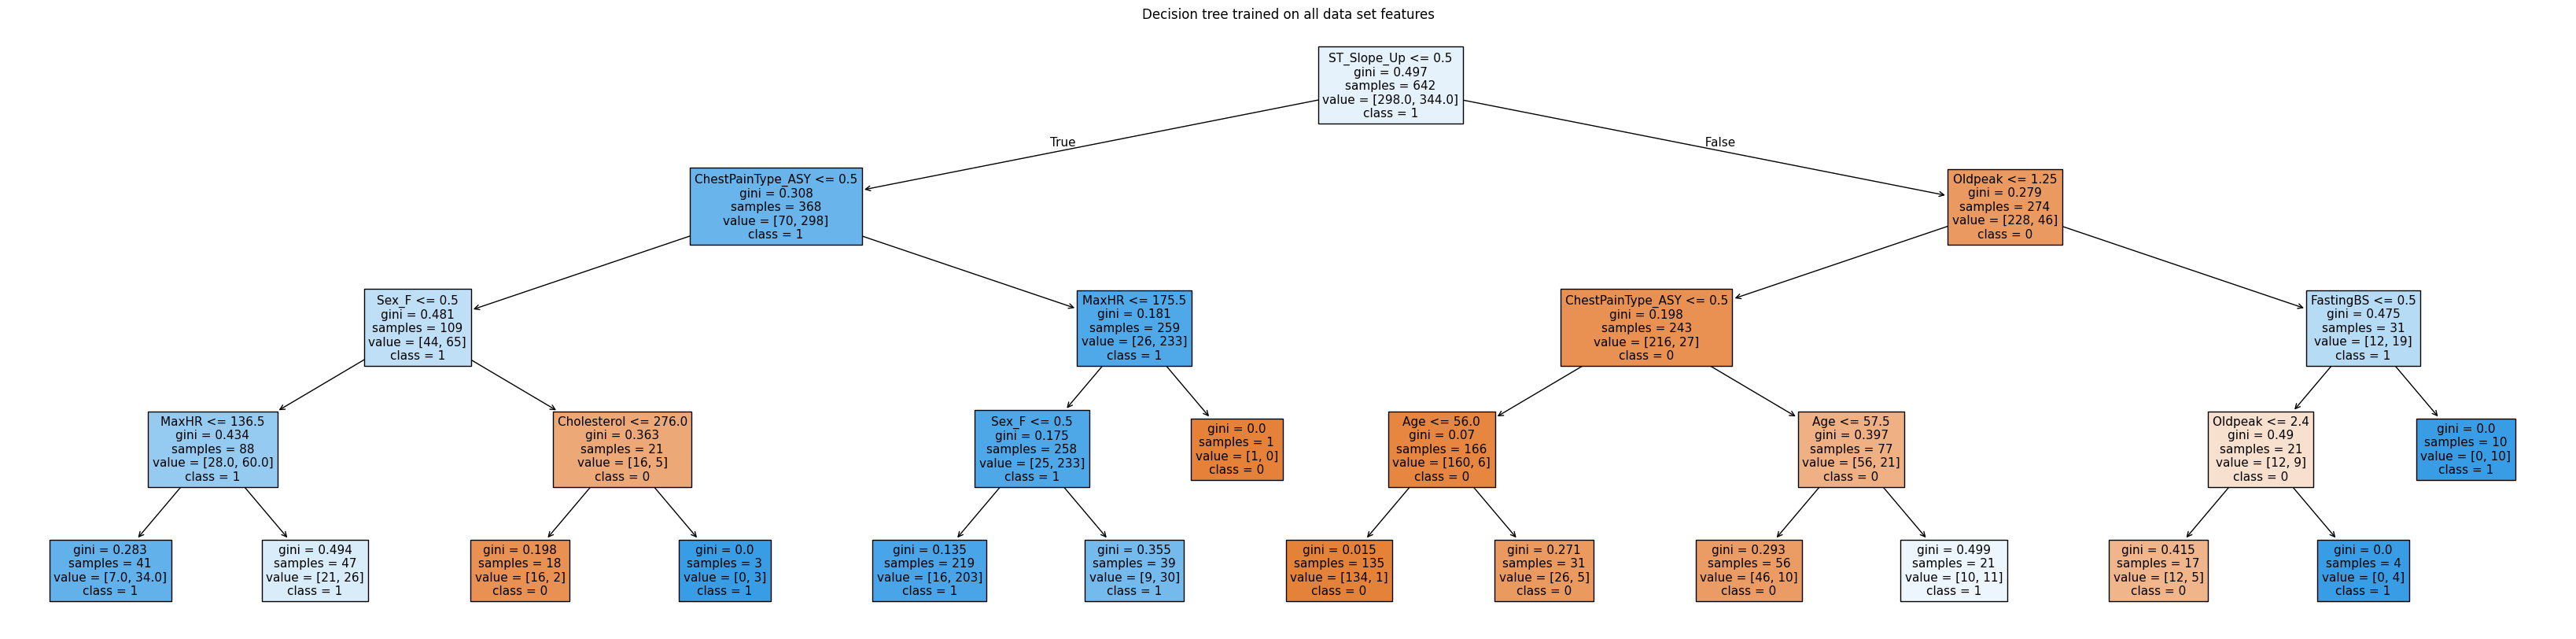

In [21]:
plt.figure(figsize=(42,10))
plot_tree(classifier_dt, filled=True, class_names = ['0', '1'], feature_names= X.columns, fontsize=11)
plt.title('Decision tree trained on all data set features')

Train the Classifier - Random Forest

In [29]:
classifier_rf = RandomForestClassifier(max_depth=4, random_state=42)
model(classifier_rf)

              precision    recall  f1-score   support

     Class 0    0.80672   0.85714   0.83117       112
     Class 1    0.89809   0.85976   0.87850       164

    accuracy                        0.85870       276
   macro avg    0.85241   0.85845   0.85484       276
weighted avg    0.86101   0.85870   0.85930       276



In [ ]:
from sklearn.externals import joblib

joblib.dump(classifier, 'model_file.pkl')